<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/LSTM_FUTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 8.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [62]:
import pandas as pd
import numpy as np

In [63]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

In [64]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [99]:
num = data1.values

In [ ]:
num = num/min(num)
num

In [67]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [68]:
n_steps = 3
# split into samples
X, y = prepare_data(num, n_steps)

In [ ]:
print(X),print(y)

In [70]:
X.shape

(46, 3, 1)

In [71]:
y.shape

(46, 1)

In [72]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

In [75]:
l = []
for i in num[-3:]:
  for j in i:
    l.append(j)

In [76]:
l

[19.039444538345894, 23.793685671331094, 5.064219693802208]

In [ ]:
x_input = np.array(l)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<20):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

In [84]:
day_new=np.arange(1,50)
day_pred=np.arange(49,69)

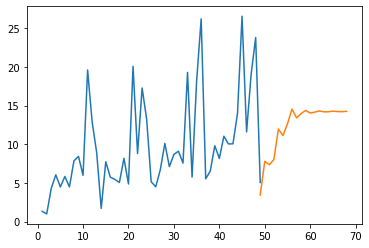

In [85]:
import matplotlib.pyplot as plt
plt.plot(day_new,num)
plt.plot(day_pred,lst_output)
plt.show()

In [97]:
date = pd.date_range(start='2018-02-01',end='2019-09-01', freq='MS')
lst_output_data = lst_output*min(num)

In [100]:
data3 = pd.DataFrame(date,lst_output*min(num))
data3

,0
387.137508,2018-02-01
875.421074,2018-03-01
826.259165,2018-04-01
902.658692,2018-05-01
1346.487439,2018-06-01
1250.134127,2018-07-01
1420.867146,2018-08-01
1635.857300,2018-09-01
1507.702503,2018-10-01
1569.018072,2018-11-01
